In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [14]:
import pandas as pd
df = pd.read_csv("C:/Users/hp/Desktop/onlinefoods.csv")
df.head(5)




,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [16]:
from sklearn.datasets import make_classification

Age, Gender = make_classification(
    n_features=6,
    n_classes=3,
    n_samples=800,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)

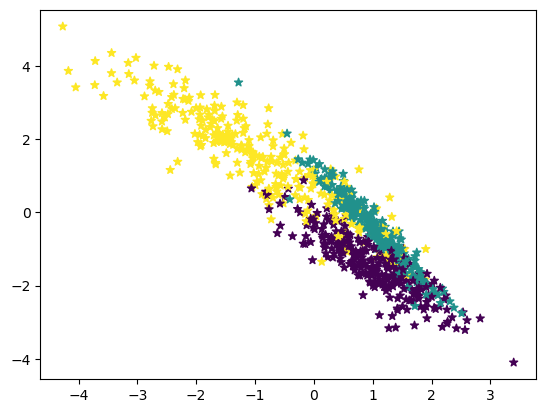

In [18]:
import matplotlib.pyplot as plt

plt.scatter(Age[:, 0], Age[:, 1], c=y, marker="*");

In [20]:
from sklearn.model_selection import train_test_split

Age_train, Age_test, Gender_train, Gender_test = train_test_split(
    Age, Gender, test_size=0.33, random_state=125
)

In [21]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(Age_train, Gender_train)

# Predict Output
predicted = model.predict([Age_test[6]])

print("Actual Value:", Gender_test[6])
print("Predicted Value:", predicted[0])

Actual Value: 0
Predicted Value: 0


In [22]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

Gender_pred = model.predict(Age_test)
accuray = accuracy_score(Gender_pred, Gender_test)
f1 = f1_score(Gender_pred, Gender_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.8484848484848485
F1 Score: 0.8491119695890328


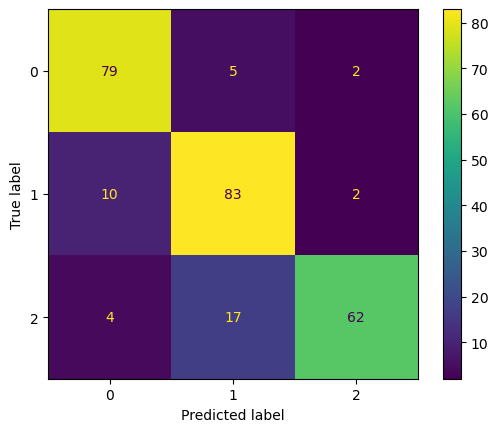

In [23]:
labels = [0,1,2]
cm = confusion_matrix(Gender_test, Gender_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


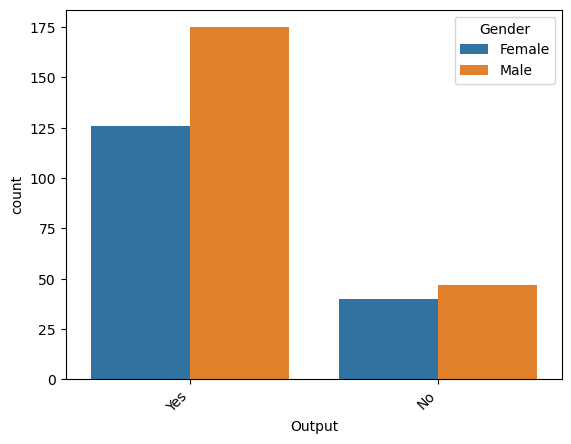

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Output' is the column you want to count and 'Gender' is the variable for coloring
sns.countplot(data=df, x='Output', hue='Gender')
plt.xticks(rotation=45, ha='right')
plt.show()


In [29]:
pre_df = pd.get_dummies(df,columns=['Output'],drop_first=True)
pre_df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Feedback,Unnamed: 12,Output_Yes
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Positive,Yes,1
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Positive,Yes,1
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Negative,Yes,1
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Positive,Yes,1
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Positive,Yes,1


In [33]:
from sklearn.model_selection import train_test_split

Age = pre_df.drop('Gender', axis=1)
Gender = pre_df['Gender']

Age_train, Age_test, Gender_train, Gender_test = train_test_split(
    Age, Gender, test_size=0.33, random_state=125
)

In [38]:
from sklearn.naive_bayes import GaussianNB

# Assuming 'Age' and 'Gender' are the correct column names
Age_train = df[['Age']]
Gender_train = df['Gender']

model = GaussianNB()
model.fit(Age_train, Gender_train)


GaussianNB()

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Age_test = df[['Age']] 


Gender_test = df['Gender']  


Gender_pred = model.predict(Age_test)

accuracy = accuracy_score(Gender_test, Gender_pred)



In [46]:
Accuracy: 0.8206263840556786
print("F1 Score:", f1)


F1 Score: 0.8491119695890328


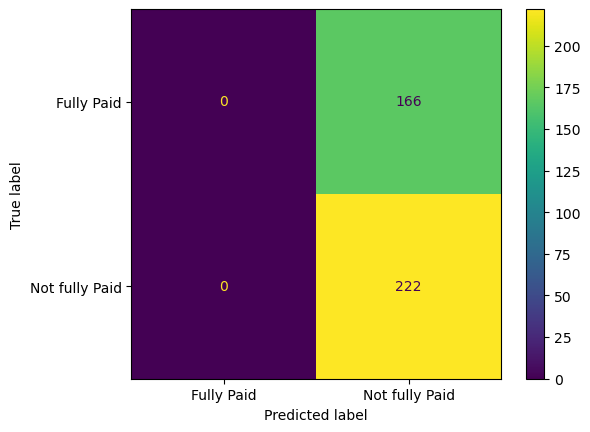

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Gender_pred = model.predict(Age_test)

labels = ["Fully Paid", "Not fully Paid"]
cm = confusion_matrix(Gender_test, Gender_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
